# 1. Download data and libraries

In [1]:
!pip install -Uqq underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 24.6 MB/s eta 0:00:00


In [2]:
!wget "https://docs.google.com/uc?export=download&id=1ddtXoXtQc5hRzj-J6_y0rtoSTfbwrLOP&confirm=t" -O VI_IMDB.csv
!wget "https://docs.google.com/uc?export=download&id=1qsNJ6xmXqLg_xQ51-OONNHjYaERsh5RE&confirm=t" -O vi_word2vec.txt

--2024-07-22 08:43:08--  https://docs.google.com/uc?export=download&id=1ddtXoXtQc5hRzj-J6_y0rtoSTfbwrLOP&confirm=t
Resolving docs.google.com (docs.google.com)... 74.125.137.139, 74.125.137.101, 74.125.137.100, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ddtXoXtQc5hRzj-J6_y0rtoSTfbwrLOP&export=download [following]
--2024-07-22 08:43:08--  https://drive.usercontent.google.com/download?id=1ddtXoXtQc5hRzj-J6_y0rtoSTfbwrLOP&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2423 (2.4K) [text/html]
Saving to: ‘VI_IMDB.csv’

VI_IMDB.csv         100%[===================>]   2.37K  --.-KB/s    in 0s      

2

In [3]:
import gdown

# URL Google Drive của tệp CSV và tệp Word2Vec
url_csv = "https://drive.google.com/uc?id=1ddtXoXtQc5hRzj-J6_y0rtoSTfbwrLOP"

# Tên tệp đầu ra
output_csv = "VI_IMDB.csv"

# Tải tệp CSV và Word2Vec
gdown.download(url_csv, output_csv, quiet=False, fuzzy=True)


Downloading...
From (original): https://drive.google.com/uc?id=1ddtXoXtQc5hRzj-J6_y0rtoSTfbwrLOP
From (redirected): https://drive.google.com/uc?id=1ddtXoXtQc5hRzj-J6_y0rtoSTfbwrLOP&confirm=t&uuid=186b2a81-0716-4baa-9daa-6e9cc63d8e7b
To: /content/VI_IMDB.csv
100%|██████████| 159M/159M [00:02<00:00, 65.6MB/s]


'VI_IMDB.csv'

In [4]:
# Download and create new word2vec file without first information line
!wget https://public.vinai.io/word2vec_vi_words_100dims.zip
!unzip word2vec_vi_words_100dims.zip

from tqdm import tqdm

with open("word2vec_vi_words_100dims.txt", "r") as f:
    first_line = f.readline()
    num_words, dim = [int(word) for word in first_line.split()]
    print("Create word embedding file...")
    with open("vi_word2vec.txt", "w") as f_out:
        for i in tqdm(range(num_words)):
            f_out.write(f.readline())

--2024-07-22 08:43:15--  https://public.vinai.io/word2vec_vi_words_100dims.zip
Resolving public.vinai.io (public.vinai.io)... 13.225.142.7, 13.225.142.85, 13.225.142.12, ...
Connecting to public.vinai.io (public.vinai.io)|13.225.142.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 785783878 (749M) [application/zip]
Saving to: ‘word2vec_vi_words_100dims.zip’

word2vec_vi_words_1 100%[===================>] 749.38M  97.9MB/s    in 7.1s    

2024-07-22 08:43:23 (106 MB/s) - ‘word2vec_vi_words_100dims.zip’ saved [785783878/785783878]

Archive:  word2vec_vi_words_100dims.zip
  inflating: word2vec_vi_words_100dims.txt  
Create word embedding file...


100%|██████████| 1587507/1587507 [00:23<00:00, 66433.76it/s] 


# 2. Load pretrained Vietnamese word2vec

In [5]:
import torch
import torchtext.vocab as vocab

word_embedding = vocab.Vectors(name = "vi_word2vec.txt",
                               unk_init = torch.Tensor.normal_)

word_embedding.vectors.shape

/usr/local/lib/python3.10/dist-packages/torchtext/vocab/__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
/usr/local/lib/python3.10/dist-packages/torchtext/utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
100%|█████████▉| 1587506/1587507 [01:53<00:00, 13974.98it/s]


torch.Size([1587507, 100])

In [6]:
def get_vector(embeddings, word):
    """ Get embedding vector of the word
    @param embeddings (torchtext.vocab.vectors.Vectors)
    @param word (str)
    @return vector (torch.Tensor)
    """
    assert word in embeddings.stoi, f'*{word}* is not in the vocab!'
    return embeddings.vectors[embeddings.stoi[word]]

def closest_words(embeddings, vector, n=10):
    """ Return n words closest in meaning to the word
    @param embeddings (torchtext.vocab.vectors.Vectors)
    @param vector (torch.Tensor)
    @param n (int)
    @return words (list(tuple(str, float)))
    """
    distances = [(word, torch.dist(vector, get_vector(embeddings, word)).item())
                 for word in embeddings.itos]

    return sorted(distances, key = lambda w: w[1])[:n]


word_vector = get_vector(word_embedding, "Việt_Nam")

closest_words(word_embedding, word_vector)

[('Việt_Nam', 0.0),
 ('VN', 0.6608753204345703),
 ('Trung_Quốc', 0.6805075407028198),
 ('nước', 0.7456551790237427),
 ('TQ', 0.7542526721954346),
 ('của', 0.7784993648529053),
 ('biển', 0.7814522385597229),
 ('vùng_biển', 0.7835540175437927),
 ('Singapore', 0.7879586219787598),
 ('và', 0.7881312966346741)]

# 3. Vocabulary.py

In [7]:
from itertools import chain
from collections import Counter

import torch
from tqdm import tqdm
from underthesea import word_tokenize


class Vocabulary:
    """ The Vocabulary class is used to record words, which are used to convert
        text to numbers and vice versa.
    """

    def __init__(self):
        self.word2id = dict()
        self.word2id['<pad>'] = 0   # Pad Token
        self.word2id['<unk>'] = 1   # Unknown Token
        self.unk_id = self.word2id['<unk>']
        self.id2word = {v: k for k, v in self.word2id.items()}

    def __getitem__(self, word):
        return self.word2id.get(word, self.unk_id)

    def __contains__(self, word):
        return word in self.word2id

    def __len__(self):
        return len(self.word2id)

    def id2word(self, word_index):
        """
        @param word_index (int)
        @return word (str)
        """
        return self.id2word[word_index]

    def add(self, word):
        """ Add word to vocabulary
        @param word (str)
        @return index (str): index of the word just added
        """
        if word not in self:
            word_index = self.word2id[word] = len(self.word2id)
            self.id2word[word_index] = word
            return word_index
        else:
            return self[word]

    @staticmethod
    def tokenize_corpus(corpus):
        """Split the documents of the corpus into words
        @param corpus (list(str)): list of documents
        @return tokenized_corpus (list(list(str))): list of words
        """
        print("Tokenize the corpus...")
        tokenized_corpus = list()
        for document in tqdm(corpus):
            tokenized_document = [word.replace(" ", "_") for word in word_tokenize(document)]
            tokenized_corpus.append(tokenized_document)

        return tokenized_corpus

    def corpus_to_tensor(self, corpus, is_tokenized=False):
        """ Convert corpus to a list of indices tensor
        @param corpus (list(str) if is_tokenized==False else list(list(str)))
        @param is_tokenized (bool)
        @return indicies_corpus (list(tensor))
        """
        if is_tokenized:
            tokenized_corpus = corpus
        else:
            tokenized_corpus = self.tokenize_corpus(corpus)
        indicies_corpus = list()
        for document in tqdm(tokenized_corpus):
            indicies_document = torch.tensor(list(map(lambda word: self[word], document)),
                                             dtype=torch.int64)
            indicies_corpus.append(indicies_document)

        return indicies_corpus

    def tensor_to_corpus(self, tensor):
        """ Convert list of indices tensor to a list of tokenized documents
        @param indicies_corpus (list(tensor))
        @return corpus (list(list(str)))
        """
        corpus = list()
        for indicies in tqdm(tensor):
            document = list(map(lambda index: self.id2word[index.item()], indicies))
            corpus.append(document)

        return corpus

    def add_words_from_corpus(self, corpus, is_tokenized=False):
        print("Add words from the corpus...")
        if is_tokenized:
            tokenized_corpus = corpus
        else:
            tokenized_corpus = self.tokenize_corpus(corpus)
        word_freq = Counter(chain(*tokenized_corpus))
        non_singletons = [w for w in word_freq if word_freq[w] > 1]
        print(f"Number of words in the corpus: {len(word_freq)}")
        print(f"Number of words with frequency > 1: {len(non_singletons)}")
        for word in non_singletons:
            self.add(word)

In [8]:
corpus_sample = ["Với cộng đồng người Bách Việt trước đây, việc thuần hóa mèo cũng có thể theo cách thức như vậy.",
                 "Tuy nhiên, rất khó xác định được thời gian cụ thể loài mèo được thuần hóa.",
                 "Chỉ biết rằng, từ xa xưa, mèo đã là vật nuôi thân quen trong hầu hết gia đình nông dân Việt Nam."]

Vocabulary.tokenize_corpus(corpus_sample)

Tokenize the corpus...


100%|██████████| 3/3 [00:00<00:00,  7.73it/s]


[['Với',
  'cộng_đồng',
  'người',
  'Bách_Việt',
  'trước_đây',
  ',',
  'việc',
  'thuần_hóa',
  'mèo',
  'cũng',
  'có_thể',
  'theo',
  'cách_thức',
  'như_vậy',
  '.'],
 ['Tuy_nhiên',
  ',',
  'rất',
  'khó',
  'xác_định',
  'được',
  'thời_gian',
  'cụ_thể',
  'loài',
  'mèo',
  'được',
  'thuần_hóa',
  '.'],
 ['Chỉ',
  'biết',
  'rằng',
  ',',
  'từ',
  'xa_xưa',
  ',',
  'mèo',
  'đã',
  'là',
  'vật_nuôi',
  'thân_quen',
  'trong',
  'hầu_hết',
  'gia_đình',
  'nông_dân',
  'Việt_Nam',
  '.']]

In [9]:
vocab = Vocabulary()

# create vocabulary from pretrained word2vec
words_list = list(word_embedding.stoi.keys())
for word in words_list:
    vocab.add(word)

# test the vocabulary
tensor = vocab.corpus_to_tensor(corpus_sample)
corpus = vocab.tensor_to_corpus(tensor)
" ".join(corpus[0])
# >> 'Với cộng_đồng người Bách Việt trước đây , việc <unk> mèo cũng có_thể theo cách_thức như_vậy .'

Tokenize the corpus...


100%|██████████| 3/3 [00:00<00:00, 1959.96it/s]


'Với cộng_đồng người Bách_Việt trước_đây , việc <unk> mèo cũng có_thể theo cách_thức như_vậy .'

# 4. IMDBDataset.py

In [10]:
from scipy.linalg import dft
import pandas as pd
import torch
from torch.utils.data import Dataset

class IMDBDataset(Dataset):
    """ Load dataset from file csv"""

    def __init__(self, vocab, csv_fpath=None, tokenized_fpath=None):
        """
        @param vocab (Vocabulary)
        @param csv_fpath (str)
        @param tokenized_fpath (str)
        """
        self.vocab = vocab
        self.pad_idx = vocab["<pad>"]
        df = pd.read_csv(csv_fpath)

        # Kiểm tra tên cột trong DataFrame
        print("DataFrame columns:", df.columns)

        self.sentiments_list = list(df['sentiment'])
        self.reviews_list = list(df['vi_review'])

        sentiments_type = list(set(self.sentiments_list))
        sentiments_type.sort()

        self.sentiment2id = {sentiment: i for i, sentiment in enumerate(sentiments_type)}

        if tokenized_fpath:
            self.tokenized_reviews = torch.load(tokenized_fpath)
        else:
            self.tokenized_reviews = self.vocab.tokenize_corpus(self.reviews_list)

        self.tensor_data = self.vocab.corpus_to_tensor(self.tokenized_reviews, is_tokenized=True)
        self.tensor_label = torch.tensor([self.sentiment2id[sentiment] for sentiment in self.sentiments_list],
                                         dtype=torch.float64)

        print("Initialization complete")

    def __len__(self):
        return len(self.tensor_data)

    def __getitem__(self, idx):
        return self.tensor_data[idx], self.tensor_label[idx]

    def collate_fn(self, examples):
        examples = sorted(examples, key=lambda e: len(e[0]), reverse=True)

        reviews = [e[0] for e in examples]
        reviews = torch.nn.utils.rnn.pad_sequence(reviews,
                                                  batch_first=False,
                                                  padding_value=self.pad_idx)
        reviews_lengths = torch.tensor([len(e[0]) for e in examples])
        sentiments = torch.tensor([e[1] for e in examples])

        return {"reviews": (reviews, reviews_lengths), "sentiments": sentiments}

In [11]:
url = "https://docs.google.com/uc?export=download&id=1ye1ncOmfgVqlc9wTlPnhILIeHSs-BfA5&confirm=t"
output = "tokenized.pt"
gdown.download(url, output, quiet=False)

Downloading...
From: https://docs.google.com/uc?export=download&id=1ye1ncOmfgVqlc9wTlPnhILIeHSs-BfA5&confirm=t
To: /content/tokenized.pt
100%|██████████| 210M/210M [00:06<00:00, 31.3MB/s]


'tokenized.pt'

In [12]:
import pandas as pd

# Đọc tệp CSV và hiển thị 5 dòng đầu tiên
df = pd.read_csv('VI_IMDB.csv')
print("DataFrame columns:", df.columns)
print(df.head())

# Kiểm tra xem các cột sentiment và vi_review có tồn tại không
if 'sentiment' in df.columns and 'vi_review' in df.columns:
    print("Tệp CSV chứa các cột cần thiết.")
else:
    print("Tệp CSV không chứa các cột cần thiết.")

DataFrame columns: Index(['review', 'sentiment', 'vi_review'], dtype='object')
                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                           vi_review  
0  Một trong những người đánh giá khác đã đề cập ...  
1  Một sản phẩm nhỏ tuyệt vời. <br /><br />Kỹ thu...  
2  Tôi nghĩ đây là một cách tuyệt vời để dành thờ...  
3  Về cơ bản, có một gia đình mà một cậu bé (Jake...  
4  "Love in the Time of Money" của Petter Mattei ...  
Tệp CSV chứa các cột cần thiết.


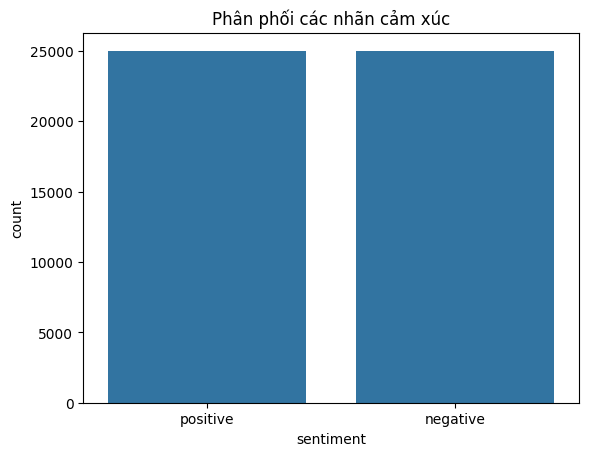

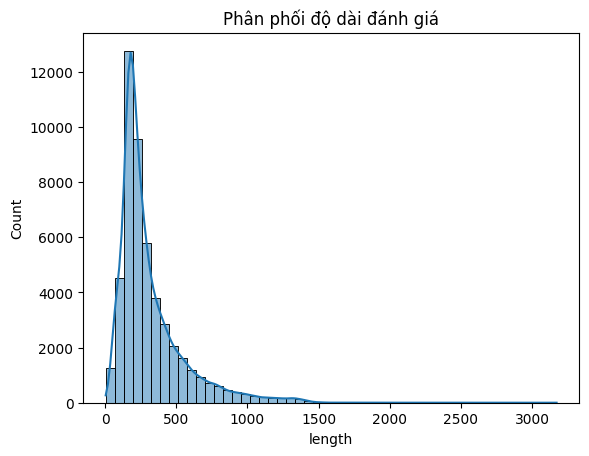

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ phân phối của các nhãn cảm xúc
sns.countplot(x='sentiment', data=df)
plt.title('Phân phối các nhãn cảm xúc')
plt.show()

# Vẽ phân phối độ dài của các đánh giá
df['length'] = df['vi_review'].apply(lambda x: len(x.split()))
sns.histplot(df['length'], bins=50, kde=True)
plt.title('Phân phối độ dài đánh giá')
plt.show()


In [14]:
dataset = IMDBDataset(vocab, "VI_IMDB.csv", "tokenized.pt")
# dataset = IMDBDataset(vocab, "VI_IMDB.csv")

DataFrame columns: Index(['review', 'sentiment', 'vi_review'], dtype='object')


100%|██████████| 50000/50000 [00:12<00:00, 4165.84it/s]

Initialization complete


In [15]:
torch.save(dataset.tokenized_reviews, "tokenized.pt")

# 5. Split data

In [16]:
from torch.utils.data import random_split


split_rate = 0.8
full_size = len(dataset)
train_size = (int)(split_rate * full_size)
valid_size = (int)((full_size - train_size)/2)
test_size = full_size - train_size - valid_size
train_dataset, valid_dataset, test_dataset = random_split(dataset,
                                                          lengths=[train_size, valid_size, test_size])

len(train_dataset), len(valid_dataset), len(test_dataset)

(40000, 5000, 5000)

In [17]:
from torch.utils.data import DataLoader


BATCH_SIZE = 100
train_dataloader = DataLoader(train_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              collate_fn=dataset.collate_fn)
valid_dataloader = DataLoader(valid_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=True,
                              collate_fn=dataset.collate_fn)
test_dataloader = DataLoader(test_dataset,
                              batch_size=BATCH_SIZE,
                              shuffle=False,
                              collate_fn=dataset.collate_fn)

# 8. Recurrent Neural Network model

In [18]:
import torch.nn as nn


class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, n_layers,
                 bidirectional, dropout, pad_idx):
        """
        @param vocab_size (int)
        @param embedding_dim (int)
        @param hidden_dim (int)
        @param n_layers (int)
        @param bidirectional (bool)
        @param dropout (float)
        @param pad_idx (int)
        """
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)

        self.rnn = nn.LSTM(embedding_dim,
                           hidden_dim,
                           num_layers=n_layers,
                           bidirectional=bidirectional,
                           dropout=dropout)

        self.fc = nn.Linear(hidden_dim * 2, 1)

        self.dropout = nn.Dropout(dropout)

    def forward(self, text, text_lengths):
        """
        @param text (torch.Tensor): shape = [sent len, batch size]
        @param text_lengths (torch.Tensor): shape = [batch size]
        @return
        """
        #text = [sent len, batch size]
        embedded = self.dropout(self.embedding(text))

        #embedded = [sent len, batch size, emb dim]

        #pack sequence
        # lengths need to be on CPU!
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.to('cpu'))

        packed_output, (hidden, cell) = self.rnn(packed_embedded)

        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors

        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]

        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        #and apply dropout

        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))

        #hidden = [batch size, hid dim * num directions]

        return self.fc(hidden)

In [19]:
INPUT_DIM = word_embedding.vectors.shape[0]
EMBEDDING_DIM = 100
BATCH_SIZE = 100
HIDDEN_DIM = 256
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5
PAD_IDX = vocab["<pad>"]
UNK_IDX = vocab["<unk>"]

model = RNN(INPUT_DIM,
            EMBEDDING_DIM,
            HIDDEN_DIM,
            N_LAYERS,
            BIDIRECTIONAL,
            DROPOUT,
            PAD_IDX)

In [20]:
model.embedding.weight.data.copy_(word_embedding.vectors)
model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [21]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 161,061,357 trainable parameters


# 9. Train the model

In [22]:
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss().to(device)

model = model.to(device)

In [23]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    @param preds (torch.Tensor): shape = [batch_size]
    @param y (torch.Tensor): shape = [batch_size]
    @return acc (torch.Tensor): shape = [1]
    """
    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division
    acc = correct.sum() / len(correct)
    return acc

In [24]:
def train(model, dataloader, optimizer, criterion, device):
    """
    @param model (RNN)
    @param dataloader (DataLoader)
    @param optimizer (torch.optim)
    @param criterion (torch.nn.modules.loss)
    @param device (torch.device)
    @return epoch_loss (float): model's loss of this epoch
    @return epoch_acc (float): model's accuracy of this epoch
    """
    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for batch in dataloader:

        optimizer.zero_grad()
        reviews, reviews_lengths = batch["reviews"]
        reviews = reviews.to(device)
        predictions = model(reviews, reviews_lengths).squeeze(1)
        sentiments = batch["sentiments"].to(device)
        loss = criterion(predictions, sentiments)
        acc = binary_accuracy(predictions, sentiments)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    batch_num = len(dataloader)
    return epoch_loss / batch_num, epoch_acc / batch_num

In [25]:
def evaluate(model, dataloader, criterion, device):
    """
    @param model (RNN)
    @param dataloader (DataLoader)
    @param criterion (torch.nn.modules.loss)
    @param device (torch.device)
    @return epoch_loss (float): model's loss of this epoch
    @return epoch_acc (float): model's accuracy of this epoch
    """
    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():
        for batch in dataloader:

            reviews, reviews_lengths = batch["reviews"]
            reviews = reviews.to(device)
            predictions = model(reviews, reviews_lengths).squeeze(1)

            sentiments = batch["sentiments"].to(device)
            loss = criterion(predictions, sentiments)
            acc = binary_accuracy(predictions, sentiments)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    batch_num = len(dataloader)
    return epoch_loss / batch_num, epoch_acc / batch_num

In [26]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [27]:
N_EPOCHS = 5

best_valid_loss = float("inf")

for epoch in range(N_EPOCHS):

    start_time = time.time()

    train_loss, train_acc = train(model, train_dataloader, optimizer, criterion, device)
    valid_loss, valid_acc = evaluate(model, valid_dataloader, criterion, device)

    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), "model.pt")

    print(f"Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s")
    print(f"\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%")
    print(f"\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%")

Epoch: 01 | Epoch Time: 2m 1s
	Train Loss: 0.614 | Train Acc: 63.99%
	 Val. Loss: 0.389 |  Val. Acc: 83.10%
Epoch: 02 | Epoch Time: 2m 2s
	Train Loss: 0.373 | Train Acc: 84.05%
	 Val. Loss: 0.300 |  Val. Acc: 88.00%
Epoch: 03 | Epoch Time: 2m 1s
	Train Loss: 0.321 | Train Acc: 86.83%
	 Val. Loss: 0.292 |  Val. Acc: 88.06%
Epoch: 04 | Epoch Time: 2m 1s
	Train Loss: 0.250 | Train Acc: 90.27%
	 Val. Loss: 0.291 |  Val. Acc: 89.02%
Epoch: 05 | Epoch Time: 2m 2s
	Train Loss: 0.194 | Train Acc: 92.80%
	 Val. Loss: 0.276 |  Val. Acc: 89.72%


# 9. Test the model

In [28]:
test_loss, test_acc = evaluate(model, test_dataloader, criterion, device)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.282 | Test Acc: 89.14%


In [29]:
def predict_sentiment(model, sentence, vocab, device):
    model.eval()
    corpus = [sentence]
    tensor = vocab.corpus_to_tensor(corpus)[0].to(device)
    tensor = tensor.unsqueeze(1)
    length = [len(tensor)]
    length_tensor = torch.LongTensor(length)
    prediction = torch.sigmoid(model(tensor, length_tensor))
    return prediction.item()

In [30]:
dataset.sentiment2id

{'negative': 0, 'positive': 1}

In [31]:
sentence = "Bộ phim này rất dở! Nội dung cực kì nhàm chán"

predict_sentiment(model, sentence, vocab, device)

Tokenize the corpus...


100%|██████████| 1/1 [00:00<00:00, 5159.05it/s]


0.0031742695719003677

In [32]:
sentence = "Bộ phim này rất hay! Nhiều tình tiết rất kịch tính."

predict_sentiment(model, sentence, vocab, device)

Tokenize the corpus...


100%|██████████| 1/1 [00:00<00:00, 6403.52it/s]


0.9970697164535522